# CodeRefinery pre-workshop survey

As part of the registration to a CodeRefinery workshop, participants are asked to fill in a survey. This notebook contains analysis of the survey results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [2]:
typeform_survey = "typeform_survey/"
indico_survey = "indico_survey/"
years = [2016, 2017, 2018, 2019]

#### Import TypeForm survey results

Collect all data into single dataframe `df_survey`

In [3]:
df_survey_tf = pd.DataFrame()
dfs = []
keys = []
for f in glob.glob(typeform_survey+'/20*/*.csv'):
    dfs.append(pd.read_csv(f))
    key = f.replace("/"," ").split()[1:]
    keys.append("-".join(key).replace(".csv",""))

df_survey_tf = pd.concat(dfs, keys=keys, ignore_index=False, sort=False)
df_survey_tf.head()

What is the <strong>operating system</strong> that you will use during the course (on your laptop)?  \
2017-linkoeping-nov 0                                              Linux                                                    
                    1                                              Linux                                                    
                    2                                              Linux                                                    
                    3                                           Mac OS X                                                    
                    4                                              Linux                                                    

                      Other  \
2017-linkoeping-nov 0   NaN   
                    1   NaN   
                    2   NaN   
                    3   NaN   
                    4   NaN   

                      Which <strong>version</strong> of operating system are you using? If your operating system is Linux, which <strong>distribution</strong> are you using?  \
2017-linkoeping-nov 0                                          Fedora 25                                                                                                        
                    1                                   Ubuntu 16.04 LTS                                                                                                        
                    2                                         Linux mint                                                                                                        
                    3                                             mac os                                                                                                        
                    4                                               Arch                                                                                                        

                      I don't use version control and I don't know what it is  \
2017-linkoeping-nov 0                                                NaN        
                    1  I don't use version control and I don't know w...        
                    2                                                NaN        
                    3                                                NaN        
                    4                                                NaN        

                      I don't use version control but I know what it is  \
2017-linkoeping-nov 0                                               NaN   
                    1                                               NaN   
                    2                                               NaN   
                    3                                               NaN   
                    4                                               NaN   

                      I use version control, but I don't know which system  \
2017-linkoeping-nov 0                                                NaN     
                    1                                                NaN     
                    2                                                NaN     
                    3                                                NaN     
                    4                                                NaN     

                       Git Mercurial Subversion  CVS  ...  Software licensing  \
2017-linkoeping-nov 0  Git       NaN        NaN  NaN  ...  Software licensing   
                    1  NaN       NaN        NaN  NaN  ...  Software licensing   
                    2  Git       NaN        NaN  NaN  ...                 NaN   
                    3  Git       NaN        NaN  NaN  ...                 NaN   
                    4  Git       NaN        NaN  NaN  ...                 NaN   

                       Documentation     Start Date (UTC)  \
2017-linkoeping-nov 0  Documentation  2017-11-06 10:03:53   
     

#### Merging split columns

Some questions are split over two columns (one containing NaNs for a given workshop)

In [4]:
from difflib import SequenceMatcher

# function to compare similarity between two strings
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

# comparing column names

for n1 in range(len(df_survey_tf.columns)-1):
    for n2 in range(n1+1, len(df_survey_tf.columns)):
        col1 = df_survey_tf.columns[n1]
        col2 = df_survey_tf.columns[n2]
        similarity = similar(col1, col2)
        if similarity > 0.9:
            print("col1 = ", col1)
            print("col2 = ", col2)
            print("similarity = ", similarity)
            print("===========")

col1 =  Are you using <strong>code coverage analysis</strong> in your programming project(s)?
col2 =  Are you using <strong>code coverage analysis</strong> in your programming project(s)?
similarity =  0.9882352941176471
col1 =  Are you using the <strong>Travis or Jenkins</strong> continuous integration service in your programming project(s)?
col2 =  Are you using the <strong>Travis or Jenkins</strong> continuous integration service in your programming project(s)?
similarity =  0.991304347826087
col1 =  Are you using an <strong>integrated development environment (IDE)</strong> for your programming project(s)?
col2 =  Are you using an <strong>integrated development environment (IDE)</strong> for your programming project(s)?
similarity =  0.9906542056074766
col1 =  Please specify your main <strong>academic discipline</strong>.
col2 =  Please specify your main <strong>academic discipline</strong>.
similarity =  0.9838709677419355


These are the duplicate columns:

In [5]:
travis = [df_survey_tf.columns.get_loc(c) for c in df_survey_tf.columns if "Travis or Jenkins" in c]
codecov = [df_survey_tf.columns.get_loc(c) for c in df_survey_tf.columns if "code coverage analysis" in c]
ide = [df_survey_tf.columns.get_loc(c) for c in df_survey_tf.columns if "integrated development environment" in c]
discipline = [df_survey_tf.columns.get_loc(c) for c in df_survey_tf.columns if "academic discipline" in c]

dupl = {"travis":travis, "codecov":codecov, "ide":ide, "discipline":discipline}

Copy from second to first column if value is not NaN

In [6]:
df_survey_tf.iloc[:,dupl["travis"][0]].fillna(df_survey_tf.iloc[:,dupl["travis"][1]], inplace=True)
df_survey_tf.iloc[:,dupl["codecov"][0]].fillna(df_survey_tf.iloc[:,dupl["codecov"][1]], inplace=True)
df_survey_tf.iloc[:,dupl["ide"][0]].fillna(df_survey_tf.iloc[:,dupl["ide"][1]], inplace=True)
df_survey_tf.iloc[:,dupl["discipline"][0]].fillna(df_survey_tf.iloc[:,dupl["discipline"][1]], inplace=True)

Remove reduntant column after copying non-NaN values

In [7]:
rmlist = [x[1] for x in dupl.values()]
df_survey_tf.drop(df_survey_tf.columns[rmlist], axis=1, inplace=True)

#### Import Indico survey results

In [8]:
df_survey_indico = pd.DataFrame()
dfs = []
keys = []
for f in glob.glob(indico_survey+'/20*/*.csv'):
    dfs.append(pd.read_csv(f))
    key = f.replace("/"," ").split()[1:]
    keys.append("-".join(key).replace(".csv",""))

df_survey_indico = pd.concat(dfs, keys=keys, ignore_index=False, sort=False)
for i in df_survey_indico:
    # remove unnecessary string from index:
    df_survey_indico.rename(columns=lambda x: 
                       x.replace("Pre-workshop survey: ", ""), 
                       inplace=True)
df_survey_indico.head()


Submitter  Submitter Email  \
2019-tartu-april 0        NaN              NaN   
                 1        NaN              NaN   
                 2        NaN              NaN   
                 3        NaN              NaN   
                 4        NaN              NaN   

                                     Submission Date  \
2019-tartu-april 0  2019-02-14 15:55:58.982557+00:00   
                 1  2019-02-22 15:15:58.139408+00:00   
                 2  2019-02-26 09:24:21.860048+00:00   
                 3  2019-02-26 10:01:14.607507+00:00   
                 4  2019-02-26 12:37:19.380675+00:00   

                   What is the operating system that you will use during the course (on your laptop)?  \
2019-tartu-april 0                                              macOS                                   
                 1                                            Windows                                   
                 2                                              macOS                                   
                 3                                              Linux                                   
                 4                                              Linux                                   

                   Which version of operating system are you using? If your operating system is Linux, which distribution are you using? This will help us to create more targeted installation instructions.  \
2019-tartu-april 0                                      macOS 10.13.6                                                                                                                                           
                 1                                         Windows 10                                                                                                                                           
                 2                                       macOS Sierra                                                                                                                                           
                 3               I am using Ubuntu Ubuntu 18.04.2 LTS                                                                                                                                           
                 4                                       Ubuntu 16.04                                                                                                                                           

                        Are you using version control? If yes, which?  \
2019-tartu-april 0  I don't use version control but I know what it...   
                 1  I don't use version control and I don't know w...   
                 2                                                Git   
                 3  I don't use version control and I don't know w...   
                 4                                                Git   

                   Which programming languages are you using or will you use in your projects?  \
2019-tartu-april 0                                    R; Python; Perl                            
                 1                                     Matlab; Python                            
                 2                                          R; Python                            
                 3                                   R; Python; Other                            
                 4                                             Python                            

                   Are you using automated testing in your programming project(s)?  \
2019-tartu-april 0                     No and I don't know what it is                
                 1                     No and I don't know what it is                
                 2                           No but I know what it is                
                 3                     No and I don't know what it is                
                 4                    

#### Total number of registration and survey replies

In [9]:
print("number of survey responses: ", len(df_survey_tf)+len(df_survey_indico))

number of survey responses:  592


### Helper functions

In [10]:
def split_multiple_choices(series):
    "Function to split multiple answers in single field in pd.Series object, modifies in-place"
    for i in series.index:
        v = series[i]
        if ";" in i:
            s = i.split(";")
            for j in s:
                try:
                    series[j.strip()] += v
                except:
                    series[j.strip()] = v        
            series.drop(labels=i, inplace=True) 
    return

In [11]:
def plot_pie(font, valcnt_series, xsize, ysize, filename, startangle=180, title=None):
    plt.rc('font', **font)

    values = valcnt_series.values
    labels = valcnt_series.index
    fig1, ax1 = plt.subplots(figsize=(xsize,ysize))
    ax1.pie(values, labels=labels, autopct='%1.0f%%',
            shadow=True, startangle=startangle)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(title)
    ax1.figure.tight_layout()
    plt.savefig(filename)

## Processing, merging TypeForm/Indico data, and plotting

#### Default plot styles

In [12]:
xsize = 10
ysize = 10
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

### Are you using version control? If yes, which?

**First TypeForm data**

In [13]:
version_control = ["I don't use version control and I don't know what it is", 
                   "I don't use version control but I know what it is", 
                   "I use version control, but I don't know which system", 
                   "Git", "Mercurial", "Subversion", "CVS", 
                   "Perforce", "Bazaar"]

stats_vc_tf = df_survey_tf[version_control].notna().sum()
#print(stats_vc_tf)
print("total counts = ", sum(stats_vc_tf.values))

total counts =  475


**Then Indico data**

In [14]:
stats_vc_i = df_survey_indico["Are you using version control? If yes, which?"].value_counts()
# need to split up values where multiple answers given
split_multiple_choices(stats_vc_i)

#print(stats_vc_i)
print("total counts = ", sum(stats_vc_i.values))

total counts =  207


**Sum up values from TypeForm and Indico surveys**

In [15]:
stats_vc = stats_vc_i.add(stats_vc_tf, fill_value=0.0)

**Plot**

/Users/ktw/anaconda3/envs/coderef/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/ktw/anaconda3/envs/coderef/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


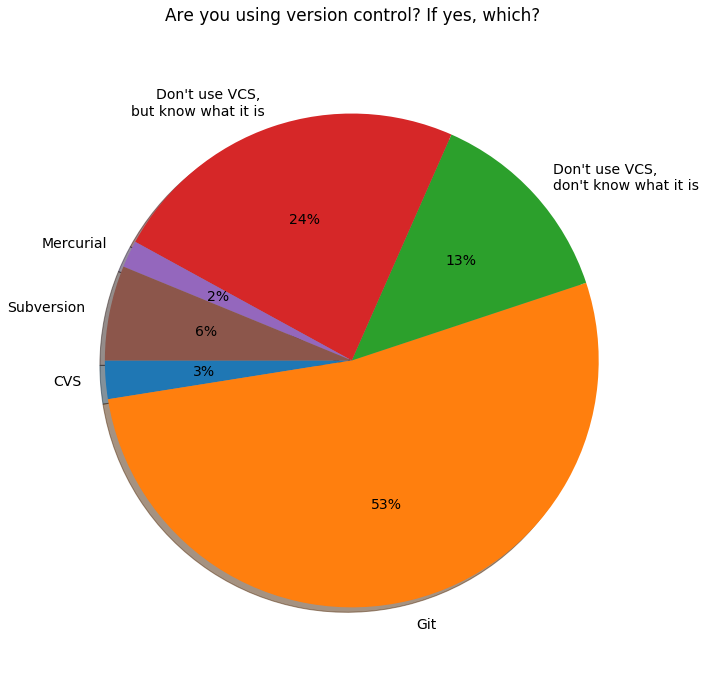

In [16]:
# renaming for less cluttering
stats_vc.rename({"I don't use version control and I don't know what it is": 
                   "Don't use VCS, \ndon't know what it is"}, inplace=True)
stats_vc.rename({"I don't use version control but I know what it is": 
                   "Don't use VCS, \nbut know what it is"}, inplace=True)
stats_vc.rename({"I use version control, but I don't know which system": 
                   "Use VCS, but don't know which"}, inplace=True)

# dropping answers below 1%
stats_vc.drop(labels="Use VCS, but don't know which", inplace=True)
stats_vc.drop(labels="Perforce", inplace=True)
stats_vc.drop(labels="Bazaar", inplace=True)
stats_vc.drop(labels="Other", inplace=True)

title = "Are you using version control? If yes, which?"
plot_pie(font, stats_vc, xsize, ysize, "img/version-control.png", title=title);


### How would you describe your programming experience?

**First TypeForm data**

In [17]:
experience='How would you describe your <strong>programming experience</strong>?'
stats_exp_tf = df_survey_tf[experience].value_counts()

#print(stats_exp_tf)
print("total counts = ", sum(stats_exp_tf.values))

total counts =  407


**Then Indico data**

In [18]:
experience='How would you describe your programming experience?'
stats_exp_i = df_survey_indico[experience].value_counts()

#print(stats_exp_i)
print("total counts = ", sum(stats_exp_i.values))

total counts =  185


**Sum up values from TypeForm and Indico surveys**

In [19]:
stats_experience = stats_exp_i.add(stats_exp_tf, fill_value=0.0)
#stats_experience

**Plot**

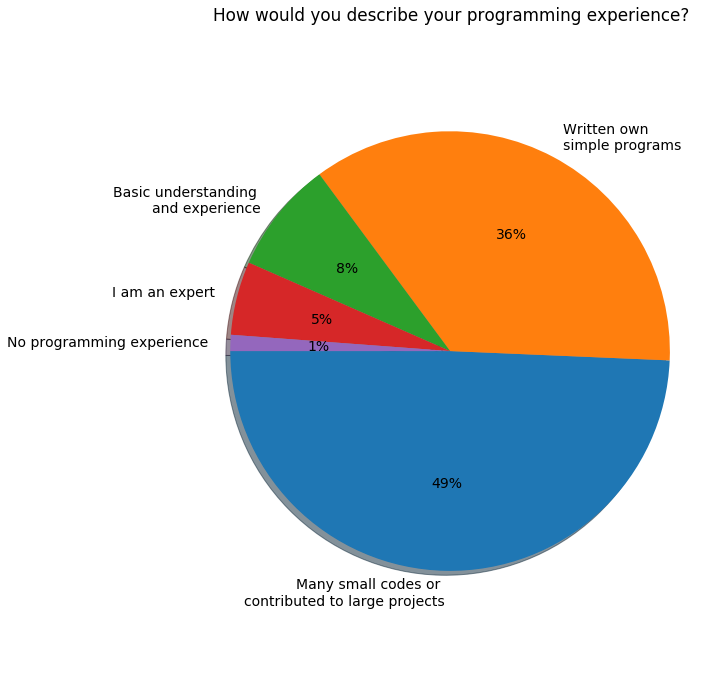

In [20]:
# renaming for less cluttering
stats_experience.rename({"I have written many small codes and/or contributed to large complex software": 
                   "Many small codes or \ncontributed to large projects"}, inplace=True)
stats_experience.rename({"I have written my own simple programs": 
                   "Written own \nsimple programs"}, inplace=True)
stats_experience.rename({"Basic understanding and experience, I have looked through code and made minor adjustments": 
                   "Basic understanding \nand experience"}, inplace=True)
stats_experience.rename({"I have no programming experience":
                   "No programming experience"}, inplace=True)

title = "How would you describe your programming experience?"
plot_pie(font, stats_experience, xsize, ysize, "img/programming-experience.png", title=title);


### What is the operating system that you will use during the course (on your laptop)?

**First TypeForm data**

In [21]:
os = 'What is the <strong>operating system</strong> that you will use during the course (on your laptop)?'
stats_os_tf = df_survey_tf[os].value_counts()

#print(stats_os_tf)
print("total counts = ", sum(stats_os_tf.values))

total counts =  404


**Then Indico data**

In [22]:
os = 'What is the operating system that you will use during the course (on your laptop)?'
stats_os_i = df_survey_indico[os].value_counts()

#print(stats_os_i)
print("total counts = ", sum(stats_os_i.values))

total counts =  185


**Add Typeform and Indico data**

In [23]:
stats_os = stats_os_tf.add(stats_os_i, fill_value=0.0)
stats_os["Mac OS X"] += stats_os["macOS"]
stats_os.drop(labels = "macOS", inplace=True)

**Plot**

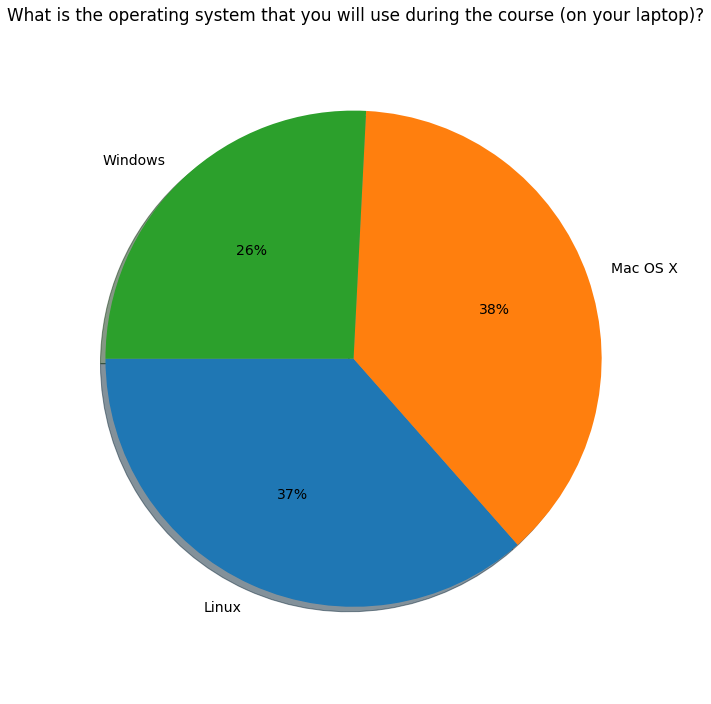

In [24]:
title = "What is the operating system that you will use during the course (on your laptop)?"
plot_pie(font, stats_os, xsize, ysize, "img/operating-system.png", title=title);

### Which programming languages are you using or will you use in your projects?

**First Typeform data**

In [25]:
languages = sorted(['C', 'C++', 'Fortran 77', 'Fortran 90+', 'Matlab',
            'Python', 'Haskell', 'R', 'Perl', 'Julia', 'Go'])

In [26]:
df_languages = df_survey_tf[languages] 
stats_lang_tf = df_languages.notna().sum()

#print(stats_lang_tf)
print("total counts = ", sum(stats_lang_tf.values))

total counts =  952


**Then Indico results**

In [27]:
lang = 'Which programming languages are you using or will you use in your projects?'
stats_lang_i = df_survey_indico[lang].value_counts()
split_multiple_choices(stats_lang_i)

#print(stats_lang_i)
print("total counts = ", sum(stats_lang_i.values))

total counts =  432


**Add up Typeform and Indico data**

In [28]:
stats_lang = stats_lang_tf.add(stats_lang_i, fill_value=0.0)

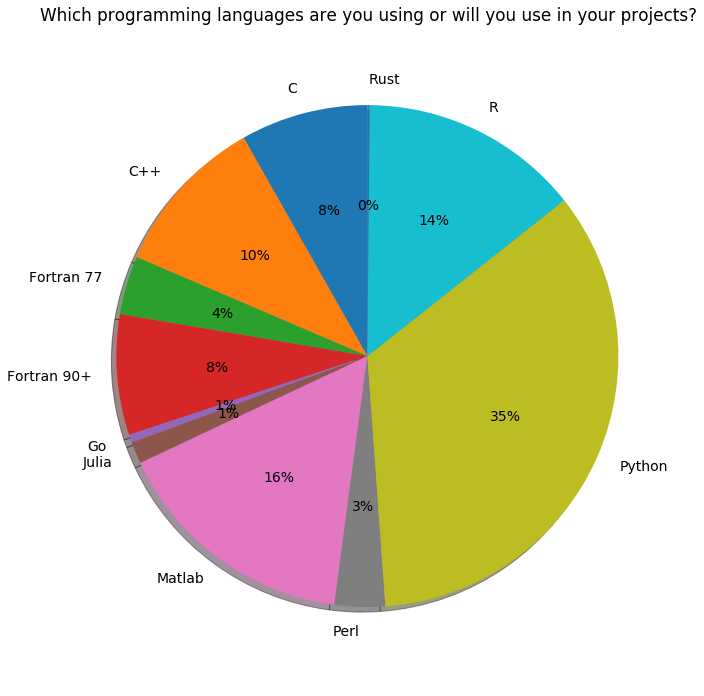

In [29]:
# dropping answers below 1%
stats_lang.drop(labels="Haskell", inplace=True)
stats_lang.drop(labels="Other", inplace=True)

title = "Which programming languages are you using or will you use in your projects?"
plot_pie(font, stats_lang, xsize, ysize, "img/languages.png", startangle=90.0, title=title);

### How do you document your code?

**First Typeform data**

In [30]:
doc = sorted(["No documentation", "Comments in the source code", 
       "Doxygen", "Wiki", "RST/Sphinx", "Read the Docs", 
       "MkDocs", "PDF", "HMTL", "Markdown", "README files"])

In [31]:
df_doc = df_survey_tf[doc] 
stats_doc_tf = df_doc.notna().sum()

#print(stats_doc_tf)
print("total counts = ", sum(stats_doc_tf.values))

total counts =  734


**Then Indico data**

In [32]:
doc = 'How do you document your code?'
stats_doc_i = df_survey_indico[doc].value_counts()
split_multiple_choices(stats_doc_i)

#print(stats_doc_i)
print("total counts = ", sum(stats_doc_i.values))

total counts =  344


**Add up Typeform and Indico data**

In [33]:
stats_doc = stats_doc_tf.add(stats_doc_i, fill_value=0.0)

**Plot**

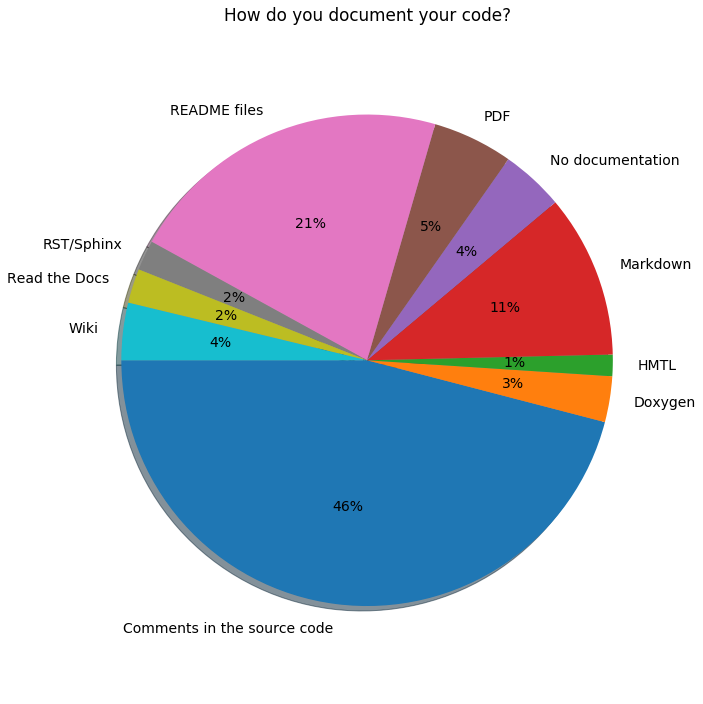

In [34]:
# dropping answers below 1%
stats_doc.drop(labels="MkDocs", inplace=True)
stats_doc.drop(labels="readthedocs.org", inplace=True)
stats_doc.drop(labels="Other", inplace=True)

title = "How do you document your code?"
plot_pie(font, stats_doc, xsize, ysize, "img/documentation.png", title=title);

### Please specify your main academic discipline

**First Typeform data**

In [35]:
discipline='Please specify your main\xa0<strong>academic discipline</strong>.'
stats_disc_tf = df_survey_tf[discipline].value_counts()

# merge all medicine and health disciplines
stats_disc_tf["Health and Medicine"] = 0.0
medicine_health = ["Health", "Medicine"]
for i in stats_disc_tf.index:
    if any(s in i for s in medicine_health if not i=="Health and Medicine"):
        stats_disc_tf["Health and Medicine"] += stats_disc_tf[i]
        stats_disc_tf.drop(labels=i, inplace=True)

# merge all engineering disciplines
stats_disc_tf["Engineering Sciences"] = 0.0
for i in stats_disc_tf.index:
    if "Engineering" in i and not i=="Engineering Sciences":
        stats_disc_tf["Engineering Sciences"] += stats_disc_tf[i]
        stats_disc_tf.drop(labels=i, inplace=True)

#print(stats_disc_tf)
print("total counts = ", sum(stats_disc_tf.values))

total counts =  407.0


**Then Indico data**

In [36]:
discipline='Please specify your main academic discipline. Please take the entry which is closest to your main field of study/work.'
stats_disc_i = df_survey_indico[discipline].value_counts()

# merge all medicine and health disciplines
stats_disc_i["Health and Medicine"] = 0.0
medicine_health = ["Health", "Medicine"]
for i in stats_disc_i.index:
    if any(s in i for s in medicine_health if not i=="Health and Medicine"):
        stats_disc_i["Health and Medicine"] += stats_disc_i[i]
        stats_disc_i.drop(labels=i, inplace=True)

# merge all engineering disciplines
stats_disc_i["Engineering Sciences"] = 0.0
for i in stats_disc_i.index:
    if "Engineering" in i and not i=="Engineering Sciences":
        stats_disc_i["Engineering Sciences"] += stats_disc_i[i]
        stats_disc_i.drop(labels=i, inplace=True)

#print(stats_disc_i)
print("total counts = ", sum(stats_disc_i.values))

total counts =  185.0


**Add up Typeform and Indico data**

In [37]:
stats_disciplines = stats_disc_tf.add(stats_disc_i, fill_value=0.0)
#stats_disciplines

**Sum up disciplines with <3% into "Other" category"**

In [38]:
if not "Other" in stats_disciplines.index:
    stats_disciplines["Other"] = 0.0
for i in stats_disciplines.index:
    if stats_disciplines[i] < 3.0:
        stats_disciplines["Other"] += stats_disciplines[i]
        stats_disciplines.drop(labels=i, inplace=True)

stats_disciplines.sort_values(ascending=False, inplace=True)

**Plot**

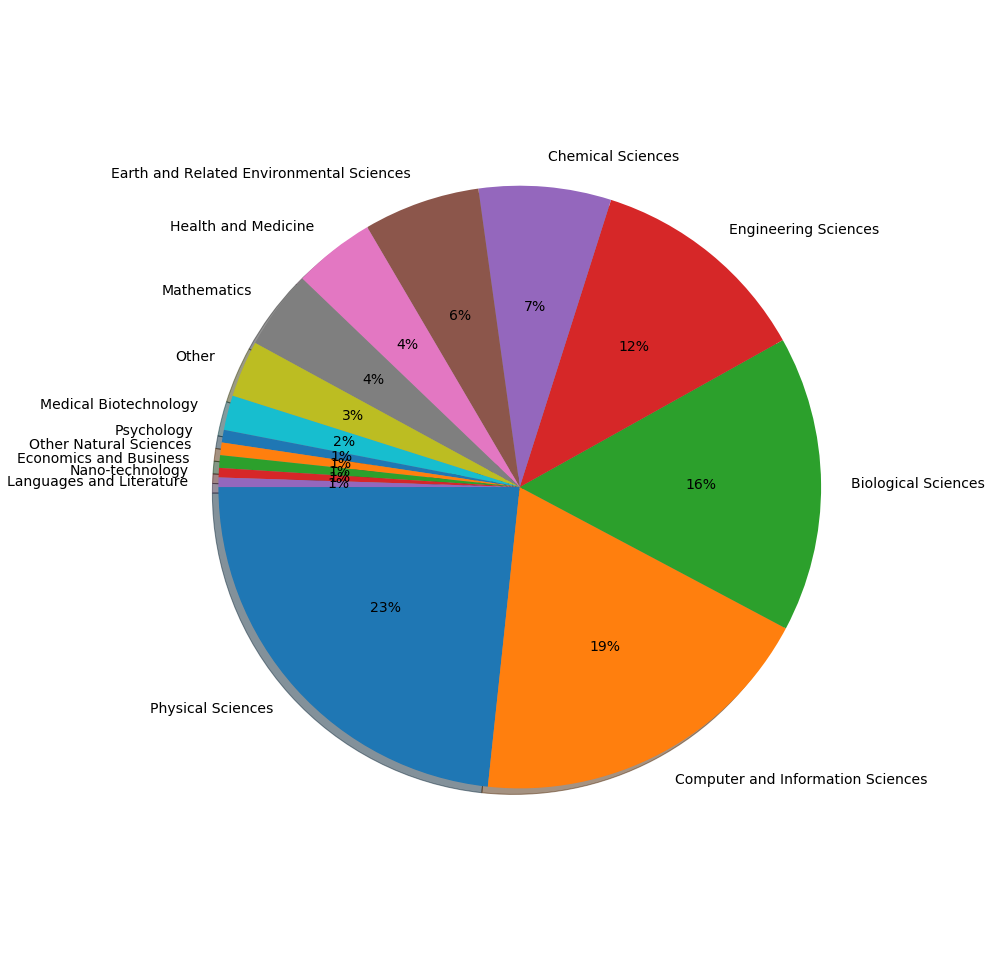

In [39]:
xsize, ysize = 14, 14
plot_pie(font, stats_disciplines, xsize, ysize, "img/scientific-discipline.png", 180.0);

### Are you using automated testing in your programming project(s)?

**First Typeform data**

In [40]:
testing='Are you using <strong>automated testing</strong> in your programming project(s)?'
stats_testing_tf = df_survey_tf[testing].value_counts()

#print(stats_testing_tf)
print("total counts = ", sum(stats_testing_tf.values))

total counts =  386


**Then Indico results**

In [41]:
testing='Are you using automated testing in your programming project(s)?'
stats_testing_i = df_survey_indico[testing].value_counts()

#print(stats_testing_i)
print("total counts = ", sum(stats_testing_i.values))

total counts =  185


**Sum up values from TypeForm and Indico surveys**

In [42]:
stats_testing = stats_testing_i.add(stats_testing_tf, fill_value=0.0)
#stats_testing

**Plot**

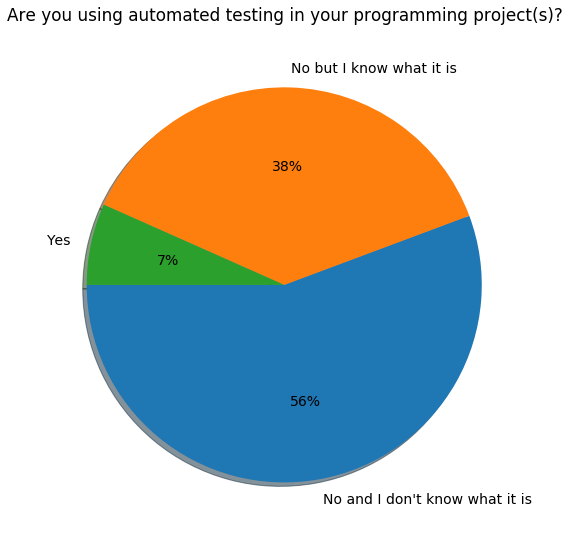

In [43]:
xsize, ysize = 8, 8
title = "Are you using automated testing in your programming project(s)?"
plot_pie(font, stats_testing, xsize, ysize, "img/automated-testing.png", title=title)

### Are you employing code review in your programming project(s)?

**First Typeform data**

In [44]:
review='Are you employing <strong>code review</strong> in your programming project(s)?'
stats_review_tf = df_survey_tf[review].value_counts()

#print(stats_review_tf)
print("total counts = ", sum(stats_review_tf.values))

total counts =  386


**Then Indico results**

In [45]:
review='Are you employing code review in your programming project(s)?'
stats_review_i = df_survey_indico[review].value_counts()

#print(stats_review_i)
print("total counts = ", sum(stats_review_i.values))

total counts =  185


**Sum up values from TypeForm and Indico surveys**

In [46]:
stats_review = stats_review_i.add(stats_review_tf, fill_value=0.0)
#stats_review

**Plot**

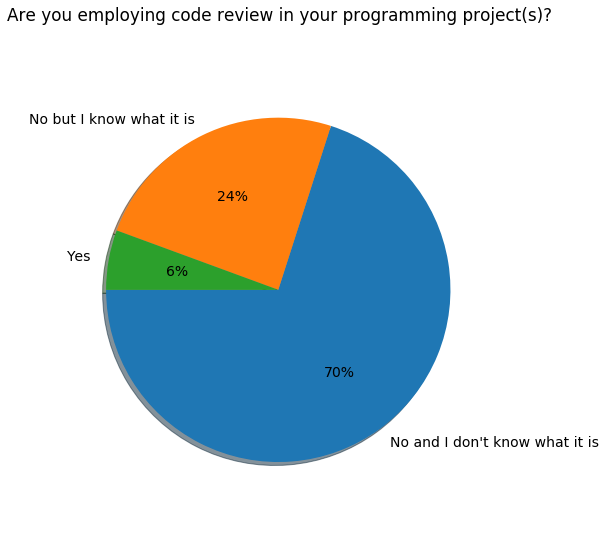

In [47]:
title = "Are you employing code review in your programming project(s)?"
plot_pie(font, stats_review, xsize, ysize, "img/code-review.png", title=title);

### Joint plot: Academic positions and scientific disciplines

In [48]:
positions = pd.read_csv("../post-workshop-survey/positions.dat", index_col=[0])

positions.rename({"Assistant/Associate/Full Professor": "Assist./Assoc./Full\nProfessor",
                 "Other": "Other (e.g. staff scientist, \nscientific programmer)",
                 "Undergraduate student": "Undergraduate \nstudent"}, 
                 axis='index', inplace=True)
positions


,What is your current position?
Position,
Graduate student,45
Postdoc,17
Researcher,13
"Other (e.g. staff scientist, \nscientific programmer)",8
Assist./Assoc./Full\nProfessor,7
Undergraduate \nstudent,2


AttributeError: 'float' object has no attribute 'deg2rad'

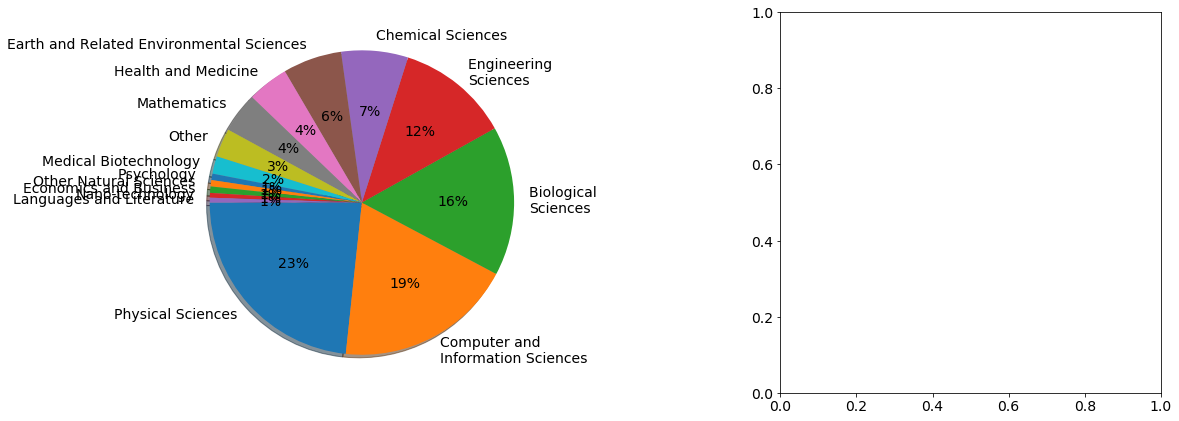

In [49]:
plt.rc('font', **font)
f, ax = plt.subplots(figsize=(20, 7))

stats_disciplines.rename({"Biological Sciences": "Biological \nSciences"}, inplace=True)
stats_disciplines.rename({"Engineering Sciences": "Engineering \nSciences"}, inplace=True)

stats_disciplines.rename({"Computer and Information Sciences": "Computer and \nInformation Sciences"}, inplace=True)

plt.subplot(1,2,1)
values = stats_disciplines.values
labels = list(stats_disciplines.index)

g1 = plt.pie(values, labels=labels, autopct='%1.0f%%', shadow=True, startangle=180)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#ax1.figure.tight_layout()

plt.subplot(1,2,2)
#explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0)  # only "explode" the 2nd slice (i.e. 'Hogs')
values = positions.values
labels = positions.index

g2 = plt.pie(values,  labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=180)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#ax1.figure.tight_layout()
#plt.gcf().subplots_adjust(right=0.85)
#plt.subplots_adjust(wspace=1.0)
#plt.subplots_adjust(hspace=-200.0)

plt.tight_layout()
plt.savefig("img/disciplines_positions.png")
